# Identitas
Nama : Junaidi Rahmat
NIM : 1104220015
Kelas : TF4602


## prepocessing 

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
data_train = 'C:/Users/junai/Documents/Project/python/UTS_sistem_cerdas/dataset/Advertising.csv'
data = pd.read_csv(data_train)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [33]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [35]:
data["total_spend"] = data.TV + data.radio + data.newspaper
data

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [36]:
data.describe()

,TV,radio,newspaper,sales,total_spend
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,200.860500
std,85.854236,14.846809,21.778621,5.217457,92.985181
min,0.700000,0.000000,0.300000,1.600000,11.700000
25%,74.375000,9.975000,12.750000,10.375000,123.550000
50%,149.750000,22.900000,25.750000,12.900000,207.350000
75%,218.825000,36.525000,45.100000,17.400000,281.125000
max,296.400000,49.600000,114.000000,27.000000,433.600000


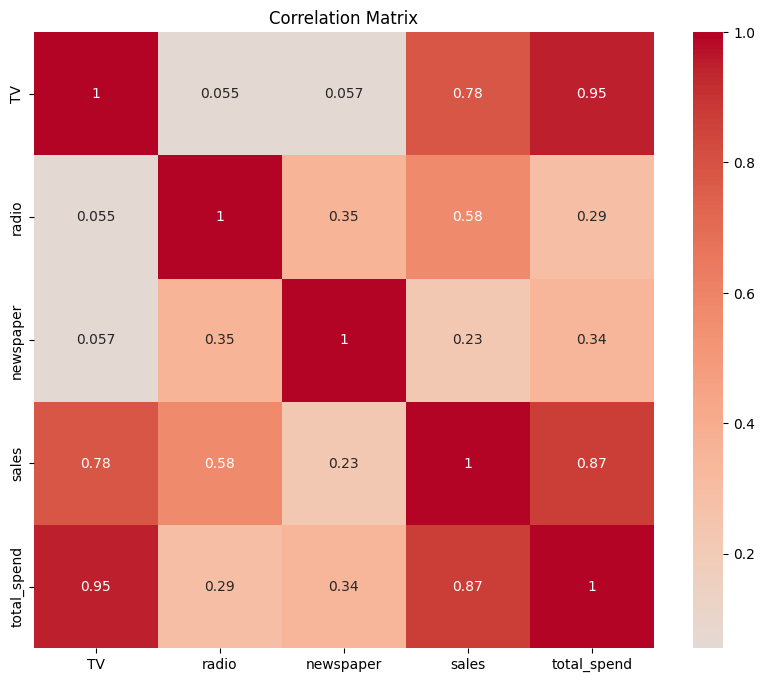

In [37]:
# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

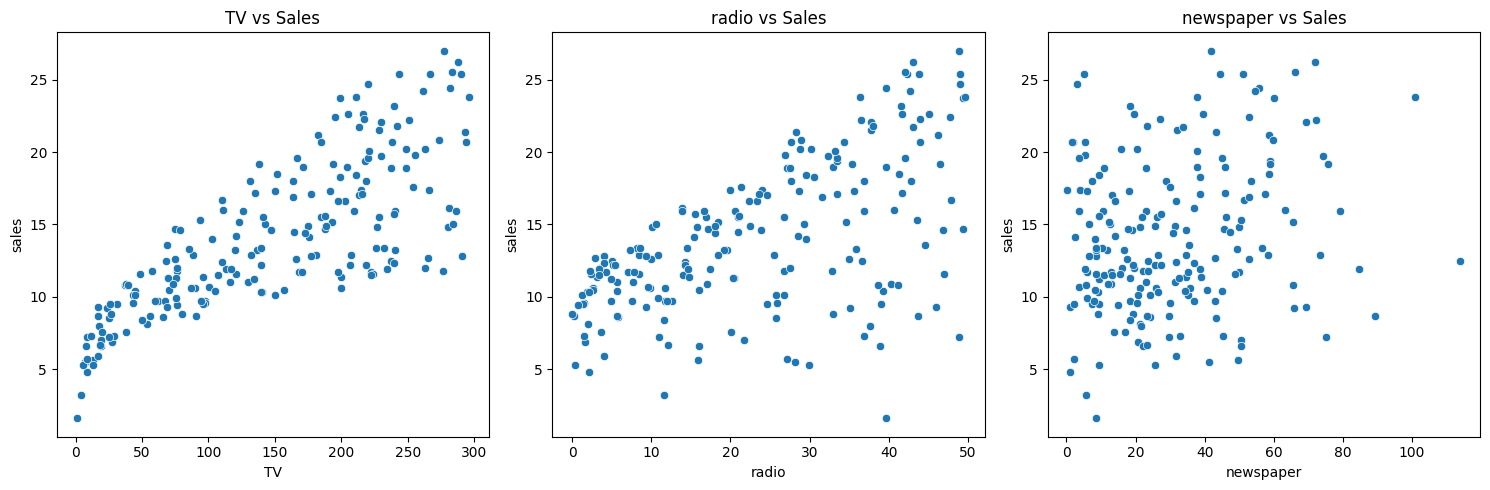

In [38]:
# Visualisasi hubungan antar variabel
plt.figure(figsize=(15, 5))
for i, column in enumerate(['TV', 'radio', 'newspaper']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=data, x=column, y='sales')
    plt.title(f'{column} vs Sales')
plt.tight_layout()
plt.show()

In [39]:
# 3. Persiapan Data
# Pisahkan fitur dan target
X = data[['TV', 'radio', 'newspaper', 'total_spend']]
y = data['sales']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of training data:", X_train_scaled.shape)
print("Shape of testing data:", X_test_scaled.shape)

Shape of training data: (160, 4)
Shape of testing data: (40, 4)


In [41]:
# 4. Membuat Model ANN
model = Sequential([
    Dense(16, activation='relu', input_dim=4),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='mse',
             metrics=['mae'])

# Tampilkan ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
# 5. Training Model
history = model.fit(X_train_scaled, y_train,
                   validation_data=(X_test_scaled, y_test),
                   epochs=100,
                   batch_size=32,
                   verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 245.3258 - mae: 14.6975 - val_loss: 236.6434 - val_mae: 14.1988
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 236.0838 - mae: 14.3366 - val_loss: 233.4801 - val_mae: 14.0869
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 230.2973 - mae: 14.1915 - val_loss: 230.4019 - val_mae: 13.9752
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 219.1847 - mae: 13.8595 - val_loss: 227.3791 - val_mae: 13.8633
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 245.2057 - mae: 14.6925 - val_loss: 224.3024 - val_mae: 13.7497
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 222.0126 - mae: 13.8441 - val_loss: 221.2911 - val_mae: 13.6367
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 236.7731 - mae: 14.2430 - val_loss: 218.1440 - val_mae: 13.5200
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 215.9638 - mae: 13.6358 - val_loss: 215.0059 - val_mae: 13.4015
Epoch 9/100
5/5 ━━━━━━━━

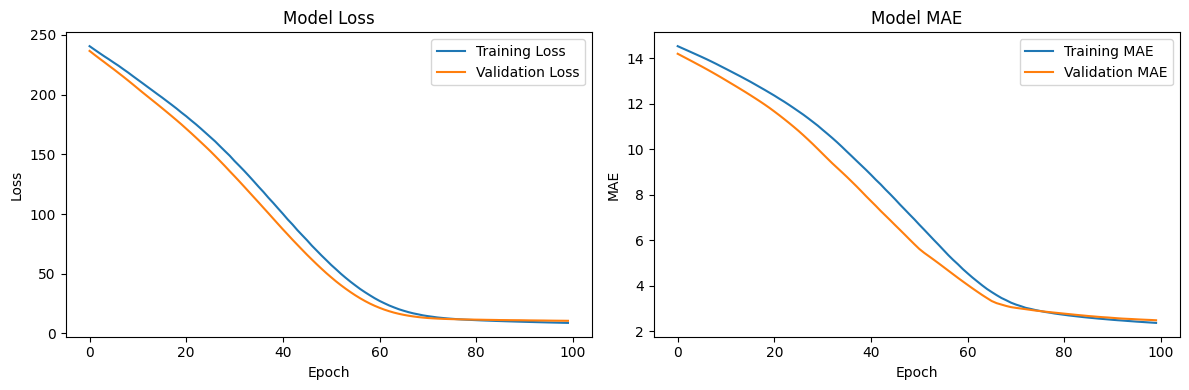

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.7917 - mae: 2.5213 

Test Loss: 10.63
Test MAE: 2.49
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


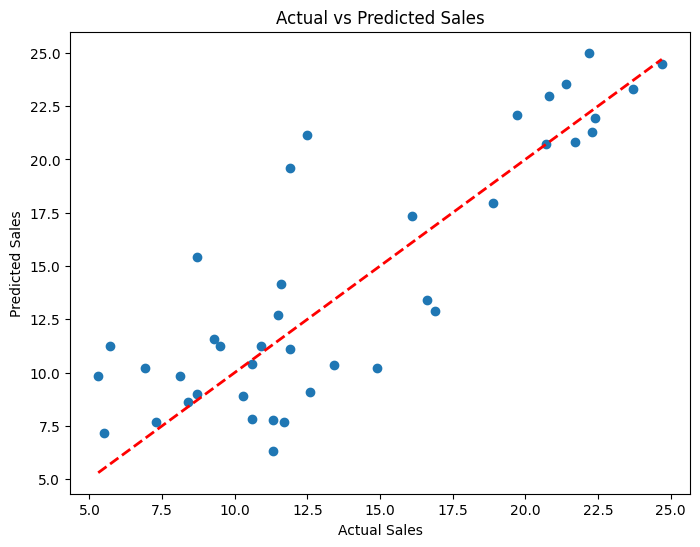

In [43]:
# 6. Evaluasi Model
# Plot learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluasi pada test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Loss: {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# Plot prediksi vs nilai aktual
y_pred = model.predict(X_test_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [44]:
# 7. Contoh Prediksi
# Membuat contoh data baru
example_data = pd.DataFrame({
    'TV': [200],
    'radio': [30],
    'newspaper': [10],
    'total_spend': [240]  # 200 + 30 + 10
})

# Normalisasi data baru
example_scaled = scaler.transform(example_data)

# Lakukan prediksi
prediction = model.predict(example_scaled)
print(f"\nPredicted sales for example data: ${prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Predicted sales for example data: $15.90


In [45]:
# 8. Fungsi untuk prediksi baru
def predict_sales(tv, radio, newspaper):
    """
    Fungsi untuk memprediksi sales berdasarkan input TV, radio, dan newspaper
    """
    total = tv + radio + newspaper
    new_data = pd.DataFrame({
        'TV': [tv],
        'radio': [radio],
        'newspaper': [newspaper],
        'total_spend': [total]
    })
    scaled_data = scaler.transform(new_data)
    prediction = model.predict(scaled_data)
    return prediction[0][0]

# Contoh penggunaan fungsi prediksi
hasil = predict_sales(tv=150, radio=25, newspaper=15)
print(f"Prediksi sales: ${hasil:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediksi sales: $10.54
